Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
!pip install plotly
!pip install textblob
!pip install wordcloud
!pip install sklearn


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [7]:
!pip install scikit-learn

In [14]:
df = pd.read_csv('D:\Sentiment-Analysis-of-Flipkart-Product-Reviews\Data/data.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\rohit\AppData\Local\Temp\ipykernel_22996\1085402284.py:1: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv('D:\Sentiment-Analysis-of-Flipkart-Product-Reviews\Data/data.csv')


,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [15]:
df.tail()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [16]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   str    
 1   Review Title     8508 non-null   str    
 2   Place of Review  8468 non-null   str    
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   str    
 6   Review text      8510 non-null   str    
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), str(5)
memory usage: 532.5 KB


In [17]:
df.describe()

,Up Votes,Down Votes,Ratings
count,8508.000000,8508.000000,8518.000000
mean,0.391396,0.121768,4.181028
std,11.613909,3.248022,1.262200
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,0.000000,5.000000
75%,0.000000,0.000000,5.000000
max,889.000000,219.000000,5.000000


<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
C:\Users\rohit\AppData\Local\Temp\ipykernel_22996\854433240.py:3: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv('D:\Sentiment-Analysis-of-Flipkart-Product-Reviews\Data\data.csv')


Correlation between Review Length and Rating: -0.20
Potential Sarcastic 5-Star Reviews: 59


C:\Users\rohit\AppData\Local\Temp\ipykernel_22996\854433240.py:41: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




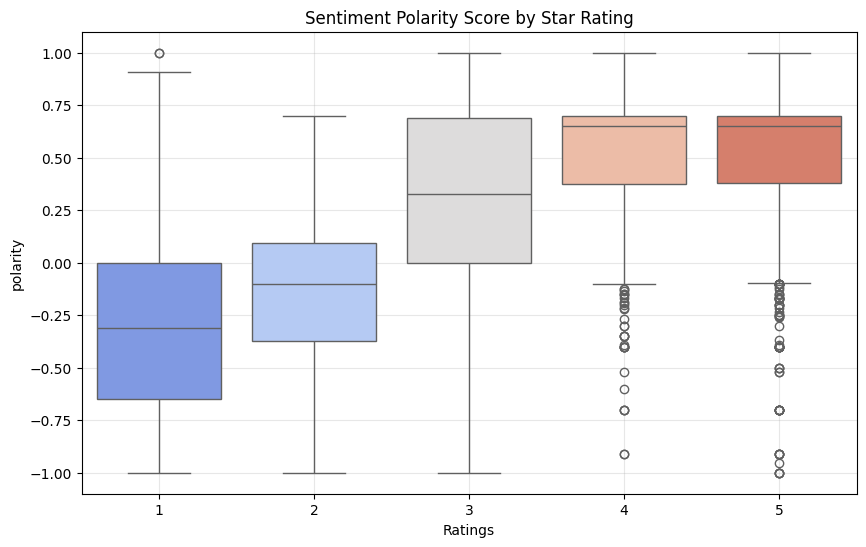

C:\Users\rohit\AppData\Local\Temp\ipykernel_22996\854433240.py:3: SyntaxWarning:

invalid escape sequence '\S'



ValueError: Invalid frequency: M. Failed to parse with error message: ValueError("'M' is no longer supported for offsets. Please use 'ME' instead.")

In [23]:
# --- 1. Data Loading & Preprocessing ---
# Load data (assuming file is named 'data.csv')
df = pd.read_csv('D:\Sentiment-Analysis-of-Flipkart-Product-Reviews\Data\data.csv')

# Handling Missing Values & Data Types
df = df.dropna(subset=['Review text', 'Ratings'])
df['date'] = pd.to_datetime(df['Month'], format='%b %Y', errors='coerce')
df['cleaned_text'] = df['Review text'].str.replace('READ MORE', '', regex=False).fillna('')

# --- 2. Feature Engineering ---
# Metadata
df['review_len'] = df['cleaned_text'].astype(str).apply(len)
df['word_count'] = df['cleaned_text'].astype(str).apply(lambda x: len(x.split()))

# Sentiment (TextBlob)
def get_polarity(text):
    return TextBlob(str(text)).sentiment.polarity

df['polarity'] = df['cleaned_text'].apply(get_polarity)

# --- 3. Analysis Findings ---

# Correlation Check
corr = df['review_len'].corr(df['Ratings'])
print(f"Correlation between Review Length and Rating: {corr:.2f}")

# Mismatched Reviews
mismatched = df[(df['Ratings'] == 5) & (df['polarity'] < -0.1)]
print(f"Potential Sarcastic 5-Star Reviews: {len(mismatched)}")

# --- 4. Visualizations (Plotly & Seaborn) ---

# A. The "J-Shaped" Distribution (Plotly)
fig_dist = px.histogram(df, x='Ratings', title='Distribution of Star Ratings (The J-Curve)',
                        color='Ratings', category_orders={"Ratings": [1, 2, 3, 4, 5]})
fig_dist.update_layout(bargap=0.2)
# fig_dist.show() # Uncomment to view interactive plot

# B. Sentiment vs Rating (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ratings', y='polarity', data=df, palette='coolwarm')
plt.title('Sentiment Polarity Score by Star Rating')
plt.grid(True, alpha=0.3)
plt.show()

# C. Temporal Trends (Plotly Time Series)
# Resample by month
df_time = df.set_index('date').resample('M').agg({'Ratings': 'mean', 'Reviewer Name': 'count'}).rename(columns={'Reviewer Name': 'Volume'})
df_time = df_time.reset_index()

fig_time = go.Figure()
fig_time.add_trace(go.Scatter(x=df_time['date'], y=df_time['Ratings'], name='Avg Rating', yaxis='y1', line=dict(color='orange')))
fig_time.add_trace(go.Bar(x=df_time['date'], y=df_time['Volume'], name='Review Volume', yaxis='y2', opacity=0.3))
fig_time.update_layout(
    title='Review Volume & Average Rating Over Time',
    yaxis=dict(title='Average Rating', range=[0, 5.5]),
    yaxis2=dict(title='Volume', overlaying='y', side='right'),
    template='plotly_white'
)
# fig_time.show() # Uncomment to view interactive plot

# --- 5. N-Gram Analysis (Pain Points) ---
def get_top_ngrams(corpus, n=3, top_k=10):
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key = lambda x: x[1], reverse=True)[:top_k]

# Extracting Pain Points (1-Star Reviews)
pain_points = get_top_ngrams(df[df['Ratings']==1]['cleaned_text'].astype(str), n=3)
print("Top 1-Star Phrases (Pain Points):", pain_points)

# --- 6. Word Clouds ---
# Note: WordCloud is a static image library, generated here for the 1-star reviews
wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(' '.join(df[df['Ratings']==1]['cleaned_text'].astype(str)))
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: 1-Star Review Themes')
plt.show()

In [24]:
df.duplicated(subset=['Review text']).sum()

np.int64(3527)

In [25]:
# 1. Deduplicate
df = df.drop_duplicates(subset=['Review text'])

In [21]:
df.duplicated(subset=['Review text']).sum()

np.int64(0)

In [27]:
df = pd.read_csv('D:\Sentiment-Analysis-of-Flipkart-Product-Reviews\Data\data_cleaned.csv')

<>:1: SyntaxWarning:

invalid escape sequence '\S'

<>:1: SyntaxWarning:

invalid escape sequence '\S'

C:\Users\rohit\AppData\Local\Temp\ipykernel_22996\1153897527.py:1: SyntaxWarning:

invalid escape sequence '\S'



In [28]:
df.duplicated(subset=['Review text']).sum()

np.int64(3527)

In [29]:
df = df.drop_duplicates(subset=['Review text'])

In [30]:
df.duplicated(subset=['Review text']).sum()

np.int64(0)

In [31]:
df.info()

<class 'pandas.DataFrame'>
Index: 4983 entries, 0 to 8509
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    4981 non-null   str    
 1   Review Title     4981 non-null   str    
 2   Place of Review  4947 non-null   str    
 3   Up Votes         4981 non-null   float64
 4   Down Votes       4981 non-null   float64
 5   Month            4712 non-null   str    
 6   Review text      4983 non-null   str    
 7   Ratings          4983 non-null   int64  
 8   cleaned_text     4981 non-null   str    
dtypes: float64(2), int64(1), str(6)
memory usage: 389.3 KB


In [32]:
df.isnull().sum()

Reviewer Name        2
Review Title         2
Place of Review     36
Up Votes             2
Down Votes           2
Month              271
Review text          0
Ratings              0
cleaned_text         2
dtype: int64

In [33]:
df = df.dropna(subset=['Place of Review', 'Month'])

In [34]:
df.isnull().sum()

Reviewer Name      0
Review Title       0
Place of Review    0
Up Votes           0
Down Votes         0
Month              0
Review text        0
Ratings            0
cleaned_text       2
dtype: int64

In [35]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,cleaned_text
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,nice product good quality price rising bad sig...
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,supplied yonex mavis 350 outside cover yonex a...
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,worst product damaged shuttlecocks packed new ...
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.READ MORE,5,good quality product delivered time
6,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more...,5,best purchase good quality durable average shu...


In [36]:
df = df.drop(columns=['Review text'])

In [37]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Ratings,cleaned_text
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,4,nice product good quality price rising bad sig...
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,1,supplied yonex mavis 350 outside cover yonex a...
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,1,worst product damaged shuttlecocks packed new ...
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,5,good quality product delivered time
6,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,5,best purchase good quality durable average shu...


In [38]:
df = df.rename(columns={'cleaned_text': 'Review text'})

In [39]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Ratings,Review text
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,4,nice product good quality price rising bad sig...
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,1,supplied yonex mavis 350 outside cover yonex a...
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,1,worst product damaged shuttlecocks packed new ...
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,5,good quality product delivered time
6,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,5,best purchase good quality durable average shu...


In [40]:
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Ratings', 'Review text'],
      dtype='str')